In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Salary_Data.csv')

In [3]:
df2=pd.read_csv('insurance.csv')

In [4]:
# 2 - Resume statistique
print('Dataset Experience / Salaire')
print(df1.head())

print(df1.describe())


Dataset Experience / Salaire
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


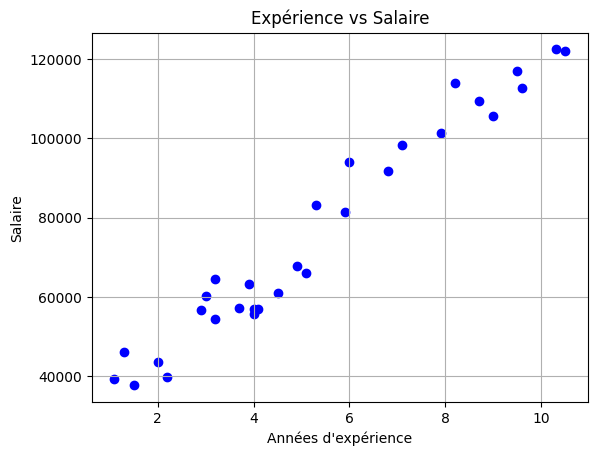

In [5]:

import matplotlib.pyplot as plt

# Nuage des points - Expérience vs Salaire
plt.scatter(df1['YearsExperience'], df1['Salary'], color='blue')
plt.title("Expérience vs Salaire")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.grid(True)
plt.show()


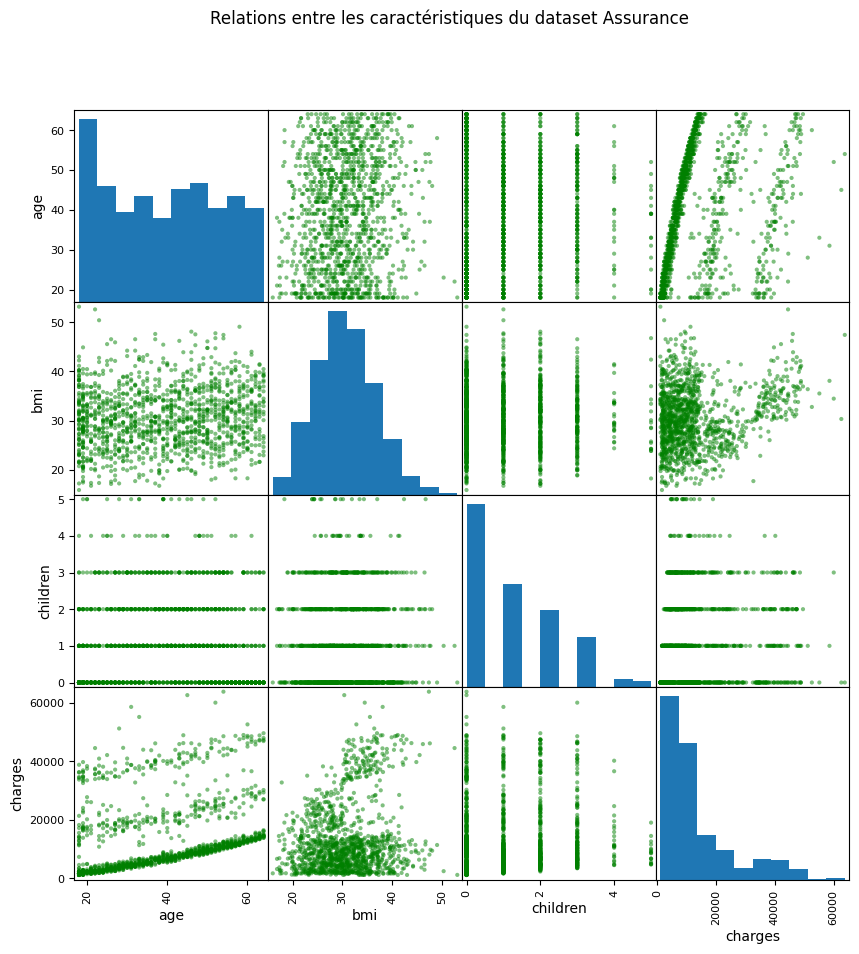

In [6]:
from pandas.plotting import scatter_matrix

# Nuages des points entre les features du dataset Assurance
scatter_matrix(df2, figsize=(10, 10), diagonal='hist', color='green')
plt.suptitle("Relations entre les caractéristiques du dataset Assurance")
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Préparer les variables indépendantes (X) et dépendantes (y)
X = df1[['YearsExperience']].values  # Variable indépendante
y = df1['Salary'].values             # Variable dépendante

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

print("Modèle entraîné.")

Modèle entraîné.


In [8]:
# Prédire les données de test
y_pred = model.predict(X_test)

print("Prédictions :", y_pred)

# Créer un DataFrame pour comparer
comparison = pd.DataFrame({'Valeur Réelle': y_test, 'Valeur Prédite': y_pred})

# Afficher les 10 premières comparaisons
print(comparison.head(10))

Prédictions : [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
   Valeur Réelle  Valeur Prédite
0       112635.0   115790.210113
1        67938.0    71498.278095
2       113812.0   102596.868661
3        83088.0    75267.804224
4        64445.0    55477.792045
5        57189.0    60189.699707


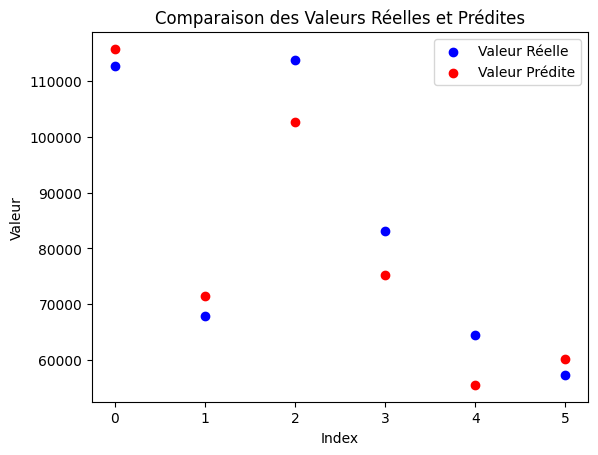

In [9]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeur Réelle')

# Tracer les valeurs prédites
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valeur Prédite')

plt.title("Comparaison des Valeurs Réelles et Prédites")
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.legend()
plt.show()


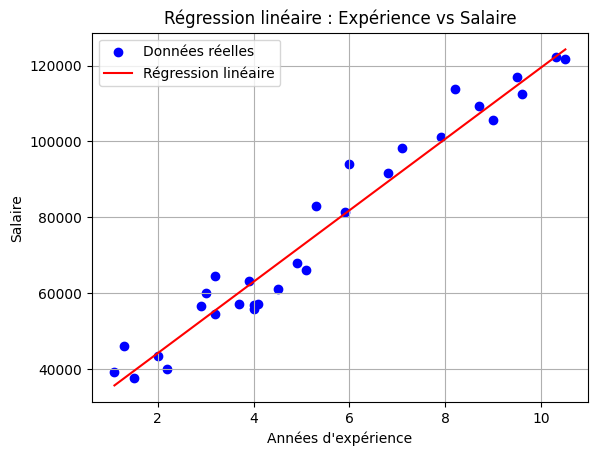

In [10]:
import matplotlib.pyplot as plt

# Tracer les données réelles (points)
plt.scatter(X, y, color='blue', label='Données réelles')

# Tracer la ligne de régression
plt.plot(X, model.predict(X), color='red', label='Régression linéaire')

plt.title("Régression linéaire : Expérience vs Salaire")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse}")
print(f"Root Mean Squared Error (RMSE) : {rmse}")
print(f"Mean Absolute Error (MAE) : {mae}")


Mean Squared Error (MSE) : 49830096.85590839
Root Mean Squared Error (RMSE) : 7059.04362190151
Mean Absolute Error (MAE) : 6286.453830757749


Statistiques descriptives des variables numériques :

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Répartition des sexes :
 sex
male      676
female    662
Name: count, dtype: int64

Répartition des fumeurs :
 smoker
no     1064
yes     274
Name: count, dtype: int64

Répartition par région :
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


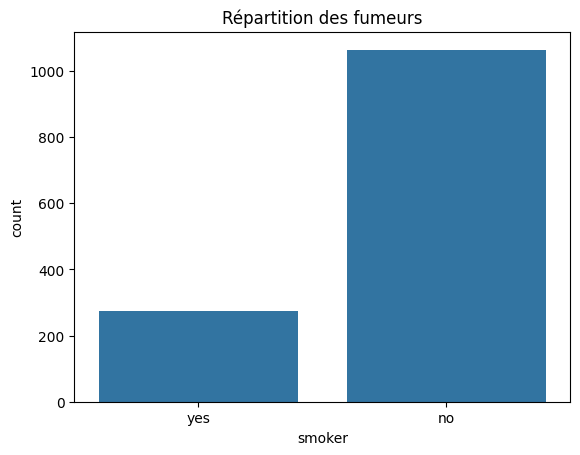

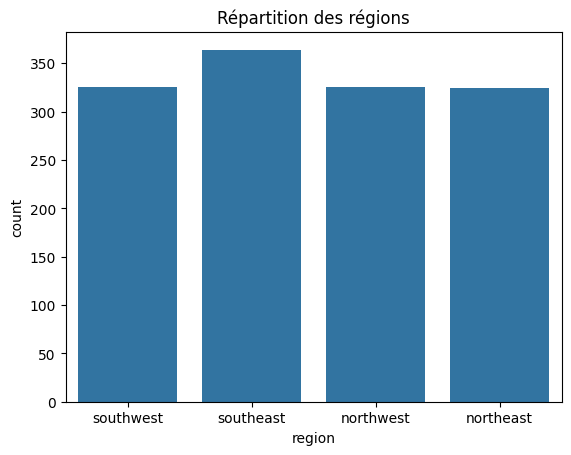

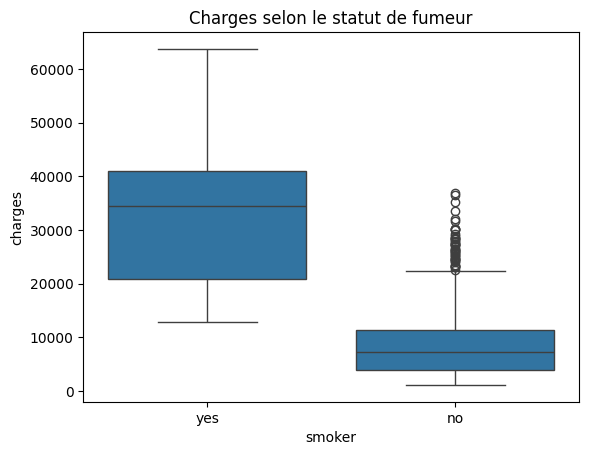

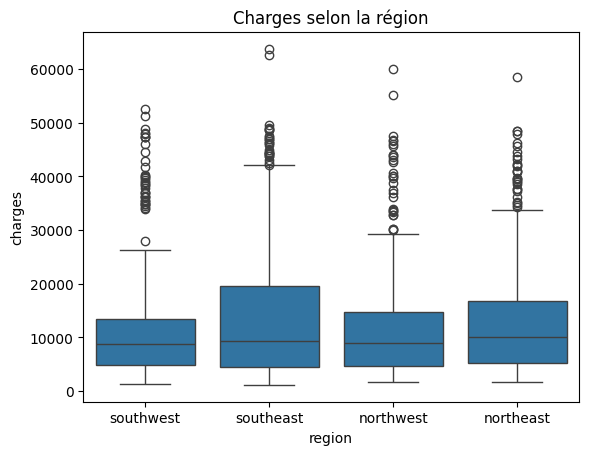

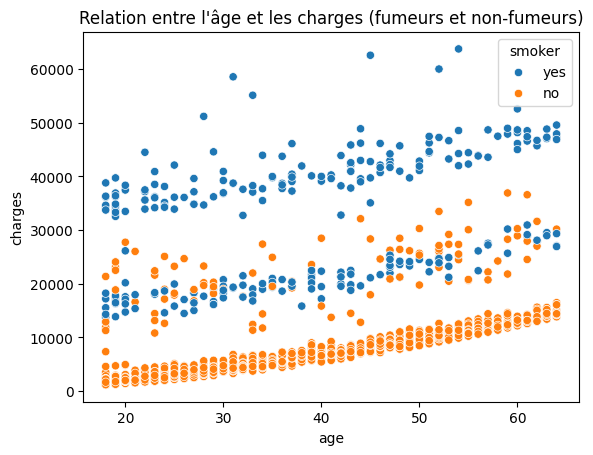

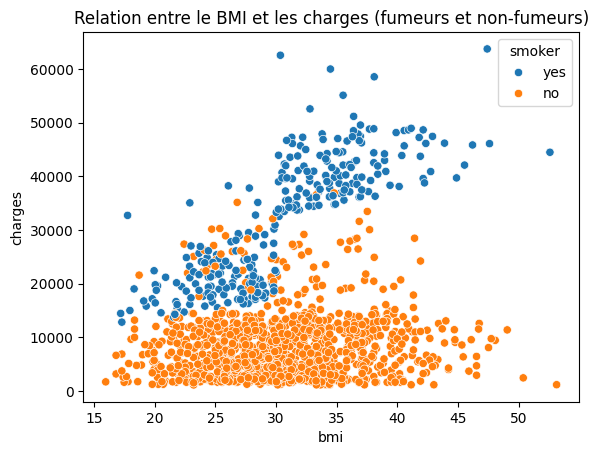

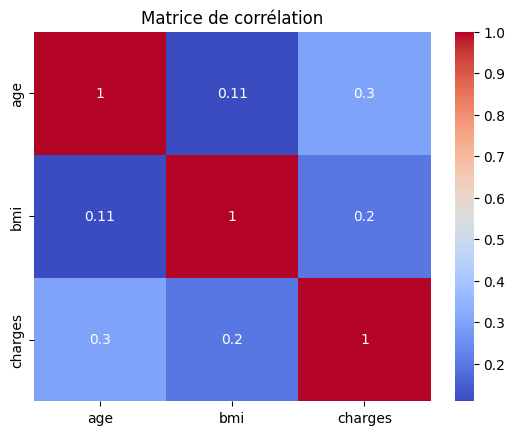

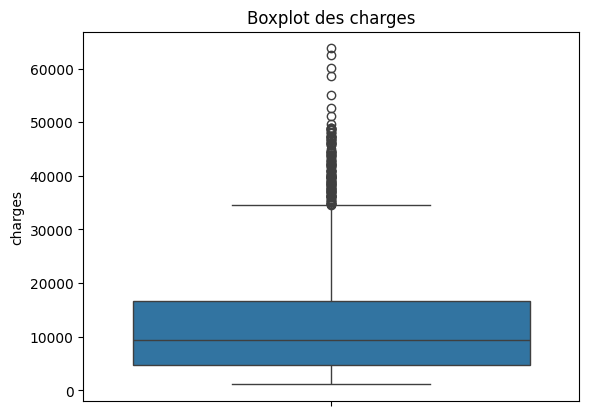

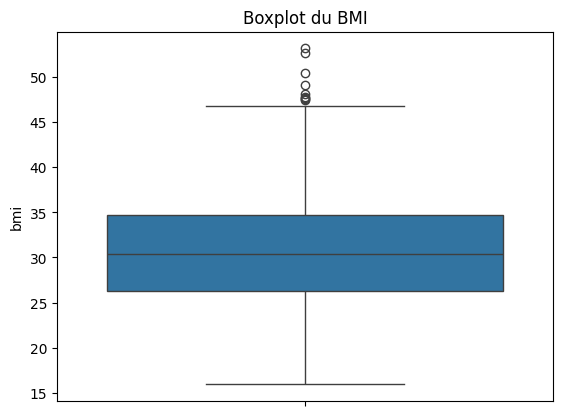


Outliers détectés :
       age     sex     bmi  children smoker     region      charges  \
34     28    male  36.400         1    yes  southwest  51194.55914   
543    54  female  47.410         0    yes  southeast  63770.42801   
577    31  female  38.095         1    yes  northeast  58571.07448   
819    33  female  35.530         0    yes  northwest  55135.40209   
1146   60    male  32.800         0    yes  southwest  52590.82939   
1230   52    male  34.485         3    yes  northwest  60021.39897   
1300   45    male  30.360         0    yes  southeast  62592.87309   

      zscore_charges  
34          3.132806  
543         4.171663  
577         3.742159  
819         3.458348  
1146        3.248148  
1230        3.861966  
1300        4.074389  

Résumé de l'EDA :
- Variables numériques analysées : age, bmi, charges
- Variables catégoriques importantes : smoker, region
- Outliers détectés dans charges et bmi


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Charger le dataset
data = pd.read_csv("insurance.csv")

# ----------------------------------------
# 1. Statistiques descriptives
# ----------------------------------------
print("Statistiques descriptives des variables numériques :\n")
print(data.describe())

# ----------------------------------------
# 2. Analyse des variables catégoriques
# ----------------------------------------

# Répartition des variables catégoriques
print("\nRépartition des sexes :\n", data['sex'].value_counts())
print("\nRépartition des fumeurs :\n", data['smoker'].value_counts())
print("\nRépartition par région :\n", data['region'].value_counts())

# Visualisation des variables catégoriques
sns.countplot(x='smoker', data=data)
plt.title("Répartition des fumeurs")
plt.show()

sns.countplot(x='region', data=data)
plt.title("Répartition des régions")
plt.show()

# ----------------------------------------
# 3. Relation entre variables catégoriques et cibles
# ----------------------------------------

# Impact du statut de fumeur sur les charges
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Charges selon le statut de fumeur")
plt.show()

# Impact de la région sur les charges
sns.boxplot(x='region', y='charges', data=data)
plt.title("Charges selon la région")
plt.show()

# ----------------------------------------
# 4. Relation entre variables numériques et cibles
# ----------------------------------------

# Scatterplot : âge vs charges
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title("Relation entre l'âge et les charges (fumeurs et non-fumeurs)")
plt.show()

# Scatterplot : BMI vs charges
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title("Relation entre le BMI et les charges (fumeurs et non-fumeurs)")
plt.show()

# Matrice de corrélation
correlation_matrix = data[['age', 'bmi', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# ----------------------------------------
# 5. Détection des anomalies (outliers)
# ----------------------------------------

# Boxplot pour les charges
sns.boxplot(y='charges', data=data)
plt.title("Boxplot des charges")
plt.show()

# Boxplot pour le BMI
sns.boxplot(y='bmi', data=data)
plt.title("Boxplot du BMI")
plt.show()

# Détection des outliers avec Z-Score
data['zscore_charges'] = zscore(data['charges'])
outliers = data[data['zscore_charges'].abs() > 3]
print("\nOutliers détectés :\n", outliers)

# ----------------------------------------
# Résumé
# ----------------------------------------
print("\nRésumé de l'EDA :")
print("- Variables numériques analysées : age, bmi, charges")
print("- Variables catégoriques importantes : smoker, region")
print("- Outliers détectés dans charges et bmi")


In [19]:
# Encodage de 'smoker' (oui/non en 1/0)
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Encodage des variables catégoriques 'sex' et 'region'
data = pd.get_dummies(data, columns=['sex', 'region'], drop_first=True)

print("Données après encodage :\n", data.head())


Données après encodage :
    age     bmi  children  smoker      charges  zscore_charges  sex_male  \
0   19  27.900         0       1  16884.92400        0.298584     False   
1   18  33.770         1       0   1725.55230       -0.953689      True   
2   28  33.000         3       0   4449.46200       -0.728675      True   
3   33  22.705         0       0  21984.47061        0.719843      True   
4   32  28.880         0       0   3866.85520       -0.776802      True   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [20]:
# Matrice de corrélation
correlation_matrix = data.corr()

# Trier les corrélations par rapport à 'charges'
print(correlation_matrix['charges'].sort_values(ascending=False))


zscore_charges      1.000000
charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


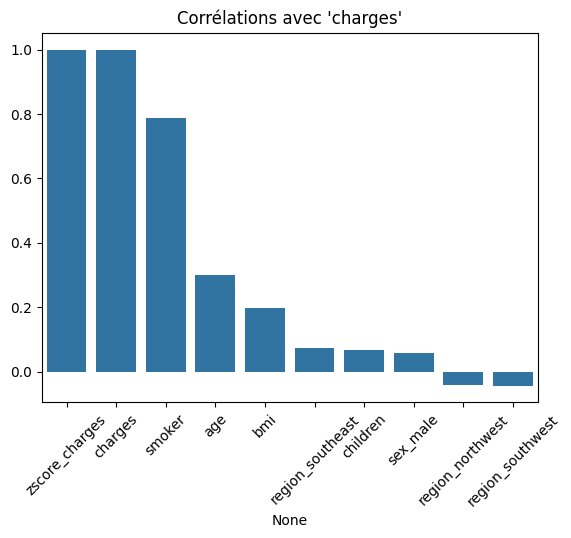

In [23]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Trier les corrélations par rapport à 'charges'
correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)

# Visualisation des corrélations
sns.barplot(x=correlation_with_charges.index, y=correlation_with_charges.values)
plt.title("Corrélations avec 'charges'")
plt.xticks(rotation=45)
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

# Sélection des propriétés choisies : 'age', 'bmi', 'smoker'
features = data[['age', 'bmi', 'smoker']]
target = data['charges']

# Appliquer la standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Afficher les premières lignes standardisées
print("Données standardisées :\n", X_scaled[:5])


Données standardisées :
 [[-1.43876426 -0.45332     1.97058663]
 [-1.50996545  0.5096211  -0.5074631 ]
 [-0.79795355  0.38330685 -0.5074631 ]
 [-0.4419476  -1.30553108 -0.5074631 ]
 [-0.51314879 -0.29255641 -0.5074631 ]]


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Afficher les coefficients du modèle
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)


Coefficients : [3643.34084567 1990.01046478 9554.03418177]
Intercept : 13321.292969032465


In [30]:
# Faire des prédictions
y_pred = model.predict(X_test)

# Afficher les premières prédictions
print("Prédictions :", y_pred[:5])



Prédictions : [ 8184.0414679   7431.00100108 37346.43709938  8629.52830485
 27316.65481023]


/tmp/ipykernel_6545/685701084.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Ligne idéale')


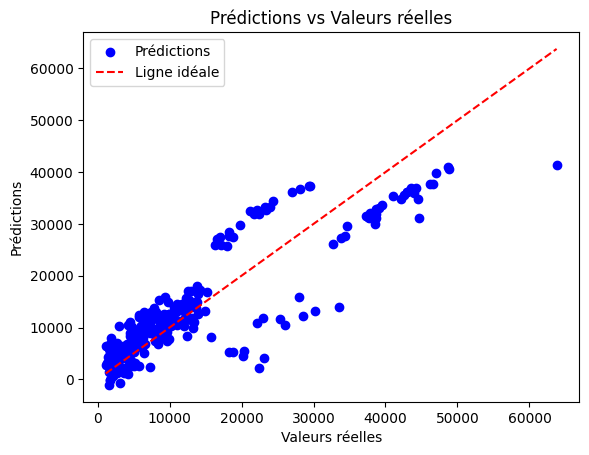

In [31]:
import matplotlib.pyplot as plt

# Comparer les valeurs réelles et prédites
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Ligne idéale')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 34512843.88022789
Root Mean Squared Error (RMSE): 5874.763304187488
Mean Absolute Error (MAE): 4260.560091099393


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Charger le dataset
data1 = pd.read_csv("china_gdp.csv")

# Préparer les variables (X = année, y = GDP)
X = data1[['Year']].values  # Année comme variable indépendante
y = data1['Value'].values   # GDP comme variable dépendante

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Créer des features polynomiales (par exemple, degré 3)
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Modèle de régression polynomiale
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [37]:
y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test_poly)


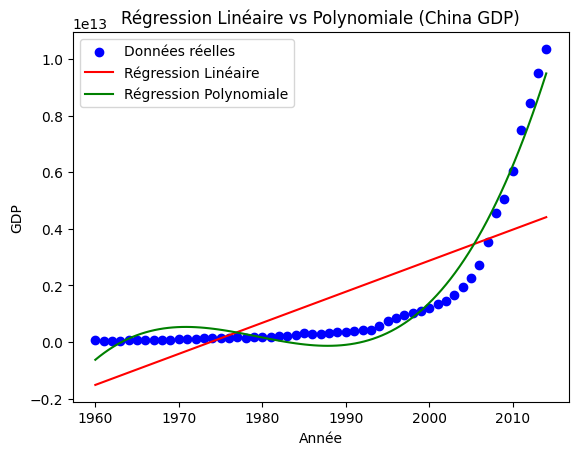

In [38]:
import matplotlib.pyplot as plt

# Prédictions pour visualisation
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_pred_linear_full = linear_model.predict(X_range)
y_pred_poly_full = poly_model.predict(poly_features.transform(X_range))

# Visualiser les résultats
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X_range, y_pred_linear_full, color='red', label='Régression Linéaire')
plt.plot(X_range, y_pred_poly_full, color='green', label='Régression Polynomiale')
plt.title("Régression Linéaire vs Polynomiale (China GDP)")
plt.xlabel("Année")
plt.ylabel("GDP")
plt.legend()
plt.show()


In [39]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"Régression Linéaire - MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}")

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Régression Polynomiale - MSE: {mse_poly}, RMSE: {rmse_poly}, MAE: {mae_poly}")

Régression Linéaire - MSE: 2.9097229920495426e+24, RMSE: 1705791016522.699, MAE: 1341446144991.7834
Régression Polynomiale - MSE: 2.1118861219593007e+23, RMSE: 459552621792.0316, MAE: 416884064618.1387
